In [245]:
import pandas as pd
# read data
df = pd.read_csv("logins.txt", sep="\t", parse_dates=[[0,1]], header=None, dtype_backend="pyarrow")
# rename cols
df.columns = ["datetime", "uname", "login"]
# split names
df[["First Letter", "Name"]] = df["uname"].str.split(".", expand=True)
# convert to
# df = df.convert_dtypes(dtype_backend="pyarrow")
jdf = df.loc[df["First Letter"]=="j"]
# get just the times in string format
# jdf["time"] = jdf["datetime"].dt.time
# # count number of unique login times by name
# print(jdf.groupby("Name")["time"].nunique().sort_values().tail(1))

In [261]:
jdf["time"] = jdf["datetime"]

jdf["time"] = jdf["time"].astype("int64") - jdf["time"].dt.normalize().astype("int64")
jdf[jdf["login"]=="IN"].groupby("Name")["time"].var().nlargest(10)

C:\Users\Morri\AppData\Local\Temp\ipykernel_45504\3219314777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jdf["time"] = jdf["datetime"]
C:\Users\Morri\AppData\Local\Temp\ipykernel_45504\3219314777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jdf["time"] = jdf["time"].astype("int64") - jdf["time"].dt.normalize().astype("int64")


Name
salano         2.320974e+26
steinberger    2.034711e+26
pickett        3.665709e+23
stpierre       3.349206e+23
mcintyre       3.348544e+23
21             3.314528e+23
escobar        3.307898e+23
curran         3.278107e+23
lemley         3.269399e+23
23             3.214848e+23
Name: time, dtype: float64

<Axes: xlabel='login'>

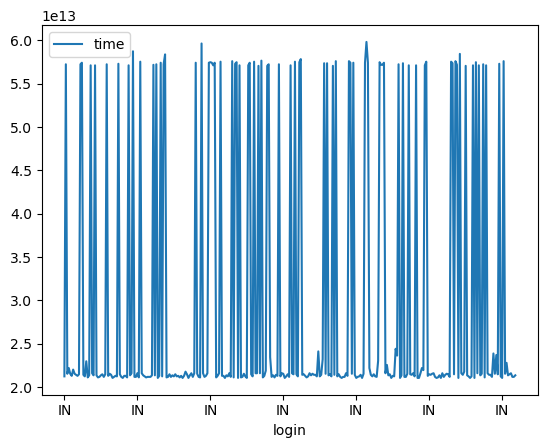

In [265]:
saldf = jdf[jdf["uname"]=="j.salano"]
saldf[saldf["login"]=="IN"].plot(x="login", y="time")

<Axes: xlabel='login'>

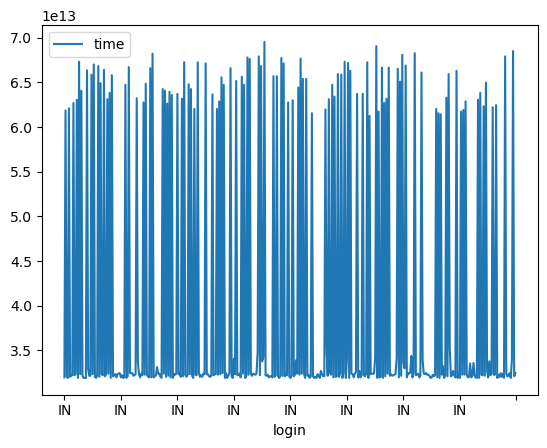

In [266]:
saldf = jdf[jdf["uname"]=="j.steinberger"]
saldf[saldf["login"]=="IN"].plot(x="login", y="time")

In [ ]:
from sklearn.

In [1]:

from collections import defaultdict
import pandas as pd
# read data
df = pd.read_csv("logins.txt", sep="\t", parse_dates=[[0,1]], header=None, dtype_backend="pyarrow")
# rename cols
df.columns = ["datetime", "uname", "login"]
# split names
df[["First Letter", "Name"]] = df["uname"].str.split(".", expand=True)


In [2]:
# limit to relevant time frame
df = df.set_index("datetime")
df = df["2021-06-01":"2021-08-30"]

In [3]:
df

,uname,login,First Letter,Name
datetime,,,,
2021-06-01 00:00:00,d.gamble,OUT,d,gamble
2021-06-01 00:00:00,d.conti,OUT,d,conti
2021-06-01 00:00:00,j.bono,OUT,j,bono
2021-06-01 00:00:00,m.pryor,OUT,m,pryor
2021-06-01 00:00:00,c.harnden,OUT,c,harnden
...,...,...,...,...
2021-08-30 23:59:00,m.ruiz,OUT,m,ruiz
2021-08-30 23:59:00,j.rudd,OUT,j,rudd
2021-08-30 23:59:00,v.campbell,OUT,v,campbell


In [136]:


adf = df.reset_index()
adf["month"] = adf['datetime'].dt.month
nd = defaultdict(dict)
for n, grp in adf.groupby(["uname", "month"]):
    nd[n[0]][n[1]] = grp["datetime"].diff(2).astype("int64").var()

nd["r.16"]

{6: 3.777009429110882e+36, 7: 3.952287231341477e+36, 8: 0.0}

In [185]:
# get rid of leading out and trailing in
cdf = df.groupby('uname').apply(lambda x: x.iloc[1:] if x['login'].iloc[0] == 'OUT' else x)
cdf = cdf.drop("uname", axis=1).reset_index()
cdf = cdf.groupby('uname').apply(lambda x: x.iloc[:-1] if x['login'].iloc[-1] == 'IN' else x)
cdf = cdf.drop("uname", axis=1).reset_index()


In [232]:
import math

# get difference in login and logout times
results = {}
for n, group in cdf.groupby('uname'):
    ins = group[group['login'] == 'IN']['datetime'].astype("int64").values
    outs = group[group['login'] == 'OUT']['datetime'].astype("int64").values
    diff = []
    for in_time, out_time in zip(ins, outs):
        time_diff = out_time - in_time
        diff.append(math.log(max(1,time_diff)))
    ldiff = (len(diff)-len(group[group['login'] == 'IN']['datetime']))
    # pad diff
    if ldiff < 0:
        diff.append(0)

    results[n] = {"diff":diff, "ins":group[group['login'] == 'IN']['datetime']}



In [198]:
# df[df["uname"]=="s.weaver"]

,uname,login,First Letter,Name
datetime,,,,
2021-06-01 08:59:00,s.weaver,IN,s,weaver
2021-06-01 17:02:00,s.weaver,OUT,s,weaver
2021-06-02 08:56:00,s.weaver,IN,s,weaver
2021-06-02 16:58:00,s.weaver,OUT,s,weaver
2021-06-03 08:58:00,s.weaver,IN,s,weaver
...,...,...,...,...
2021-08-22 17:02:00,s.weaver,OUT,s,weaver
2021-08-28 09:02:00,s.weaver,IN,s,weaver
2021-08-28 16:58:00,s.weaver,OUT,s,weaver


In [234]:
# find people with smallest variance in time logged in august and june
time_variance = {}
for name, data in results.items():
    res_df = pd.DataFrame(data)
    res_df["month"] = res_df["ins"].dt.month
    june = res_df[res_df["month"]==6]
    aug = res_df[res_df["month"]==8]
    time_variance[name] = (aug["diff"].var(), june["diff"].var())


v_by_name_df = pd.DataFrame(time_variance).T
v_by_name_df.nsmallest(5, 0)

,0,1
s.weaver,0.000013,0.000046
c.patter,0.000014,0.000030
r.conn,0.000015,0.000035
j.hermann,0.000016,0.000023
v.williams,0.000017,0.000026


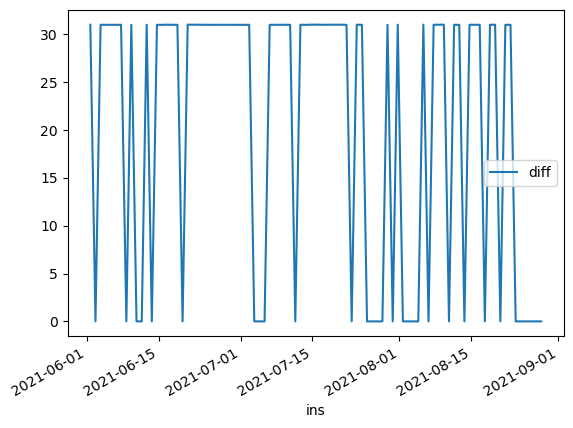

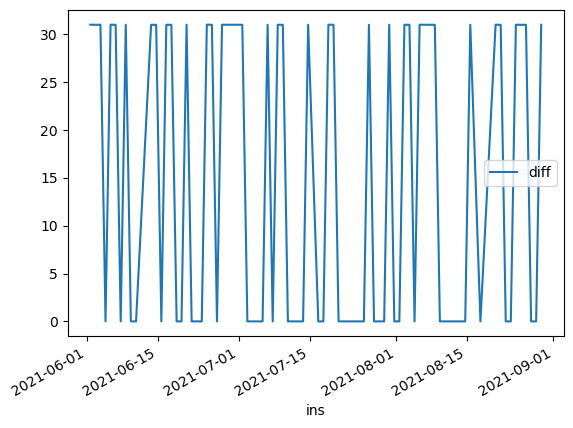

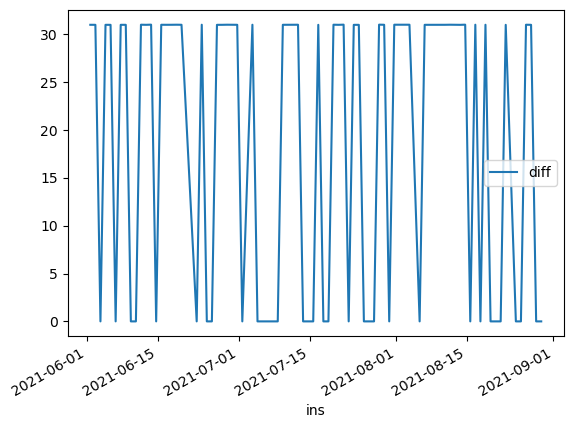

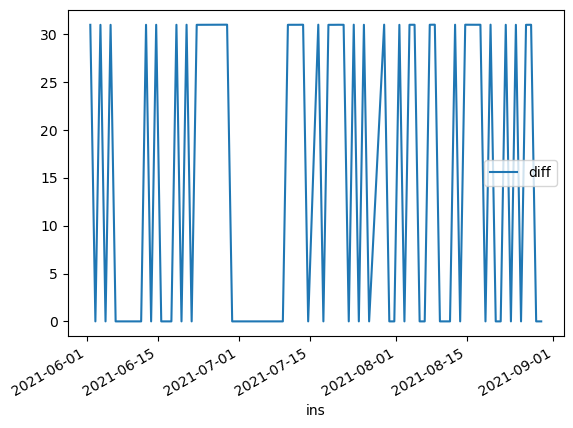

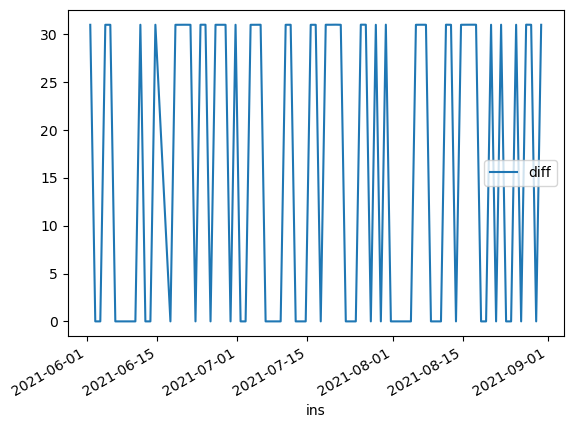

In [242]:
largest = v_by_name_df.nlargest(5, 0).index
for name in largest:
    res_df = pd.DataFrame(results[name])
    res_df.plot(x="ins", y="diff")

In [237]:
# find people with largest mean in time logged in august and june
# and the variance difference between aug and june
time_mean = {}
for name, data in results.items():
    res_df = pd.DataFrame(data)
    res_df["month"] = res_df["ins"].dt.month
    june = res_df[res_df["month"]==6]["diff"].mean()
    aug = res_df[res_df["month"]==8]["diff"].mean()
    time_mean[name] = (aug, june, (june-aug)**2)

mean_by_name_df = pd.DataFrame(time_mean).T
mean_by_name_df.nlargest(5,0)


,0,1,2
m.49,32.156029,31.950831,0.042106
d.gamble,32.116591,32.302426,0.034534
h.dyer,32.108186,32.161797,0.002874
e.theden,31.938514,32.174488,0.055684
s.pereira,31.857824,31.309856,0.300268


In [238]:
mean_by_name_df.nlargest(5,2)

,0,1,2
j.rudd,23.756860,13.772554,99.686359
r.33,19.832648,11.155396,75.294704
d.osmond,19.070011,27.726281,74.930994
r.50,18.812694,10.329243,71.968934
c.hudson,13.634122,21.127927,56.157125


j.rudd
r.33
d.osmond
r.50
c.hudson


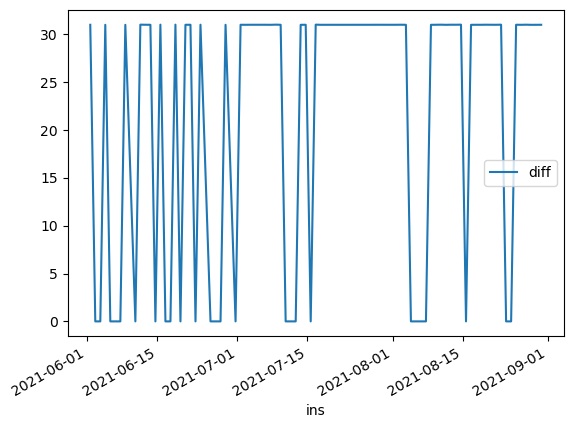

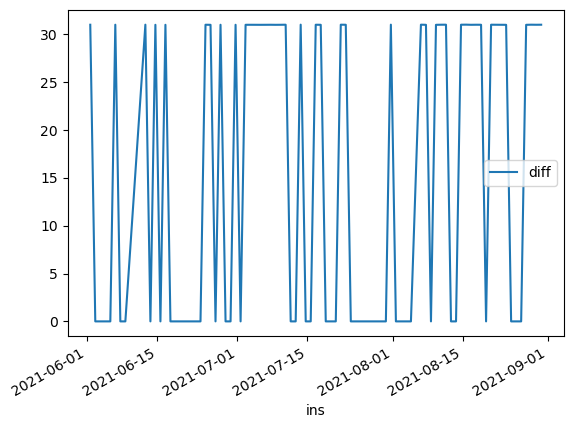

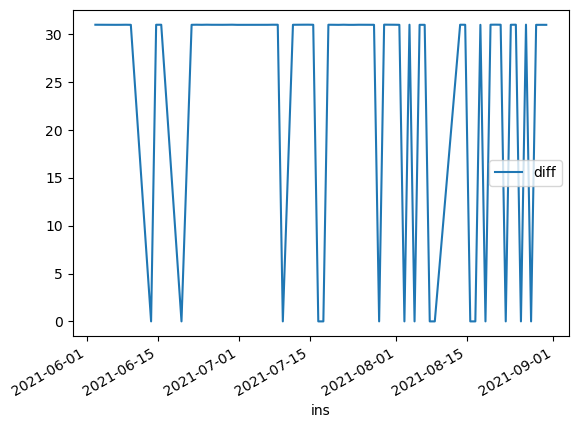

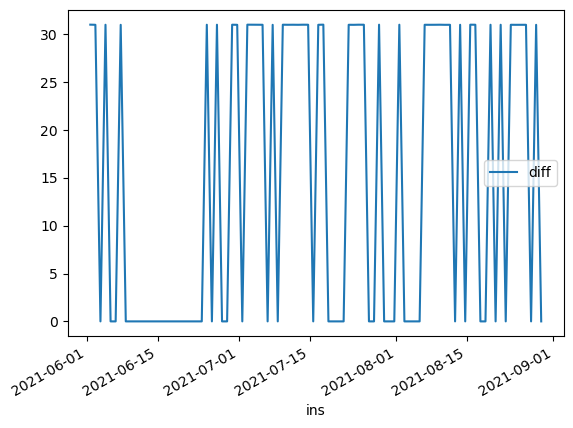

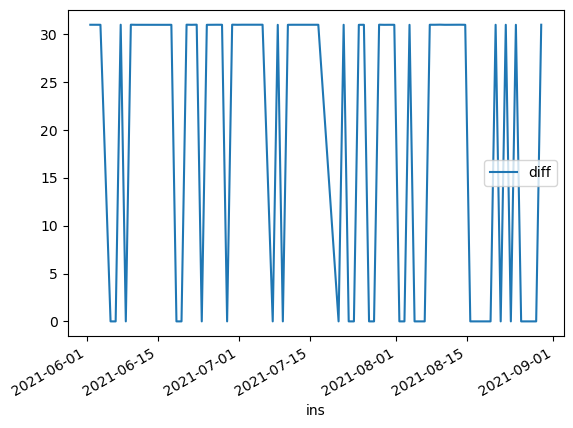

In [241]:
largest = mean_by_name_df.nlargest(5, 2).index
for name in largest:
    print(name)
    res_df = pd.DataFrame(results[name])
    res_df.plot(x="ins", y="diff")

In [ ]:
jdf_valid[jdf_valid["uname"].isin(candidates)].groupby("uname").plot(x="datetime",y="csum")


In [225]:
v_by_name_df.sort_values(0).tail(100)


,0,1
t.ladner,1.003793e+28,1.360599e+28
h.nice,1.004331e+28,5.115875e+26
h.lawson,1.005111e+28,2.381417e+27
m.kinnaman,1.005644e+28,4.972866e+27
m.sexton,1.006141e+28,2.812645e+27
...,...,...
r.dews,NaN,3.357391e+22
s.17,NaN,7.466179e+27
t.19,NaN,1.200000e+21
v.pecoraro,NaN,3.120000e+22


In [4]:
"""There's one account that changed behavior in July in a
way that is hard to detect. The employee is cheating the
timecard system."""



jdf = df.reset_index()

# Initialize a column of the time since the user's last login

logins = jdf[jdf['login'] == 'IN']
logouts = jdf[jdf['login'] == 'OUT']

def to_int(x):
    if x == "IN":
        return 1
    else:
        return -1

jdf["in_out_num"] = jdf["login"].apply(lambda x: to_int(x))



In [8]:
jdf

,datetime,uname,login,First Letter,Name,in_out_num
0,2021-06-01 00:00:00,d.gamble,OUT,d,gamble,-1
1,2021-06-01 00:00:00,d.conti,OUT,d,conti,-1
2,2021-06-01 00:00:00,j.bono,OUT,j,bono,-1
3,2021-06-01 00:00:00,m.pryor,OUT,m,pryor,-1
4,2021-06-01 00:00:00,c.harnden,OUT,c,harnden,-1
...,...,...,...,...,...,...
957001,2021-08-30 23:59:00,m.ruiz,OUT,m,ruiz,-1
957002,2021-08-30 23:59:00,j.rudd,OUT,j,rudd,-1
957003,2021-08-30 23:59:00,v.campbell,OUT,v,campbell,-1
957004,2021-08-30 23:59:00,a.31,OUT,a,31,-1


In [11]:
jdf["csum"]=jdf.sort_values("datetime").groupby("uname")["in_out_num"].cumsum()

In [46]:
jdf["month"] = jdf['datetime'].dt.month
valid_users = jdf.groupby('uname') #.apply(lambda x: len(x["month"].unique()) == 3)

In [50]:
candidates = []
for n, group in valid_users:
    if len(group["month"].unique()) < 3:
        # print(n)
        continue
    candidates.append(n)

len(candidates)

a.moorehead
b.guess
b.paradiso
c.morin
c.taylor
c.thomason
d.50
d.havlik
d.sabad
d.tye
d.wiseman
e.liptrot
f.foulkes
g.bowden
g.martucci
g.norman
g.schmitz
h.gauldin
h.romero
j.156
j.arbeiter
j.hutchinson
j.shea
j.spiegel
j.swartz
k.4
k.beard
k.buck
k.estrella
k.stoica
l.mawyer
m.melugin
m.turner
n.martinez
r.40
r.dews
s.17
s.knight
t.19
v.pecoraro
v.wentworth
w.despres


6154

In [51]:
jdf_valid = jdf[jdf["uname"].isin(candidates)]

In [54]:
jdf_valid

,datetime,uname,login,First Letter,Name,in_out_num,csum,month
0,2021-06-01 00:00:00,d.gamble,OUT,d,gamble,-1,-1,6
1,2021-06-01 00:00:00,d.conti,OUT,d,conti,-1,-1,6
2,2021-06-01 00:00:00,j.bono,OUT,j,bono,-1,-1,6
3,2021-06-01 00:00:00,m.pryor,OUT,m,pryor,-1,-1,6
4,2021-06-01 00:00:00,c.harnden,OUT,c,harnden,-1,-1,6
...,...,...,...,...,...,...,...,...
957001,2021-08-30 23:59:00,m.ruiz,OUT,m,ruiz,-1,0,8
957002,2021-08-30 23:59:00,j.rudd,OUT,j,rudd,-1,0,8
957003,2021-08-30 23:59:00,v.campbell,OUT,v,campbell,-1,0,8
957004,2021-08-30 23:59:00,a.31,OUT,a,31,-1,0,8


In [64]:
strangest = set(jdf_valid.groupby("uname")["in_out_num"].var().nlargest(10).index)

In [62]:
jdf_valid

,datetime,uname,login,First Letter,Name,in_out_num,csum,month
0,2021-06-01 00:00:00,d.gamble,OUT,d,gamble,-1,-1,6
1,2021-06-01 00:00:00,d.conti,OUT,d,conti,-1,-1,6
2,2021-06-01 00:00:00,j.bono,OUT,j,bono,-1,-1,6
3,2021-06-01 00:00:00,m.pryor,OUT,m,pryor,-1,-1,6
4,2021-06-01 00:00:00,c.harnden,OUT,c,harnden,-1,-1,6
...,...,...,...,...,...,...,...,...
957001,2021-08-30 23:59:00,m.ruiz,OUT,m,ruiz,-1,0,8
957002,2021-08-30 23:59:00,j.rudd,OUT,j,rudd,-1,0,8
957003,2021-08-30 23:59:00,v.campbell,OUT,v,campbell,-1,0,8
957004,2021-08-30 23:59:00,a.31,OUT,a,31,-1,0,8


C:\Users\Morri\AppData\Local\Temp\ipykernel_45504\3274395261.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jdf_valid[jdf["uname"]=="r.16"].plot.line(x="datetime",y="csum")


<Axes: xlabel='datetime'>

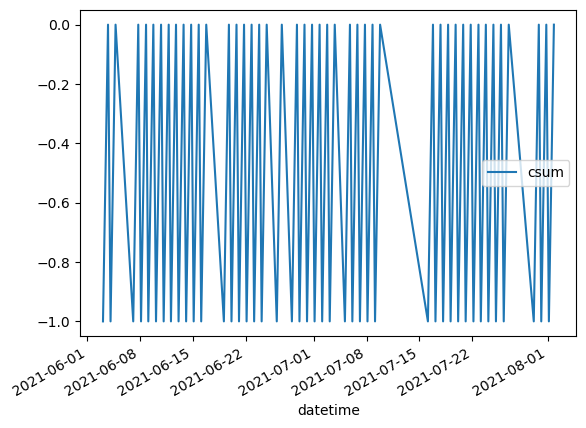

In [108]:
jdf_valid[jdf["uname"]=="r.16"].plot.line(x="datetime",y="csum")

C:\Users\Morri\AppData\Local\Temp\ipykernel_45504\3810394063.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jdf_valid[jdf["uname"].isin(strangest)].groupby("uname").plot.line(x="datetime",y="csum")


uname
a.sine         Axes(0.125,0.2;0.775x0.68)
d.hernandez    Axes(0.125,0.2;0.775x0.68)
h.romano       Axes(0.125,0.2;0.775x0.68)
j.gerrior      Axes(0.125,0.2;0.775x0.68)
j.pereira      Axes(0.125,0.2;0.775x0.68)
k.5            Axes(0.125,0.2;0.775x0.68)
k.stowers      Axes(0.125,0.2;0.775x0.68)
m.cole         Axes(0.125,0.2;0.775x0.68)
r.16           Axes(0.125,0.2;0.775x0.68)
t.derrigo      Axes(0.125,0.2;0.775x0.68)
dtype: object

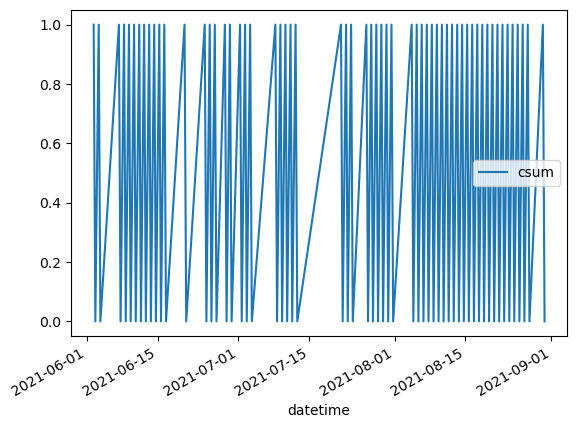

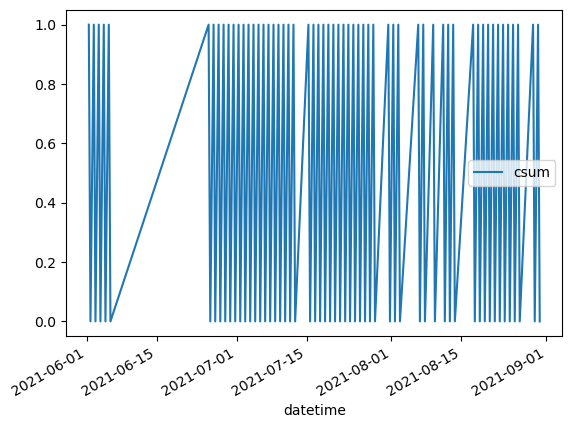

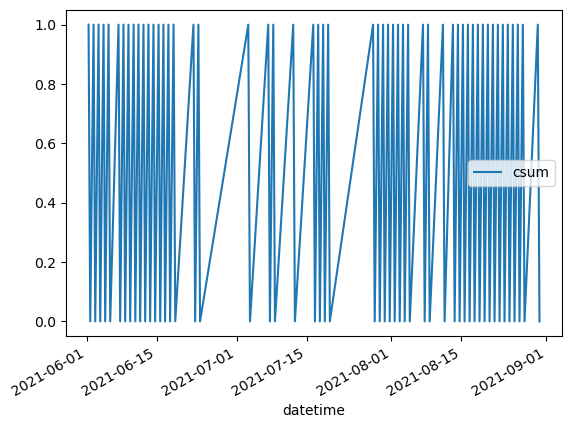

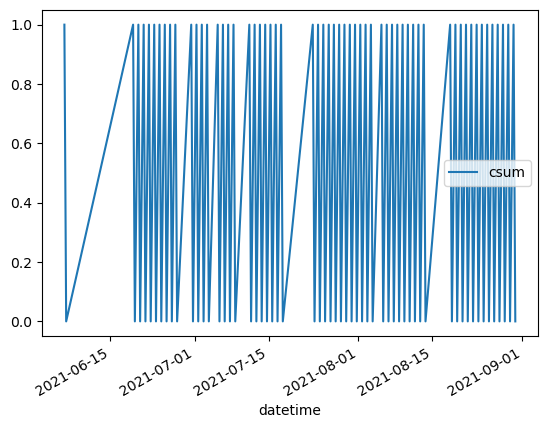

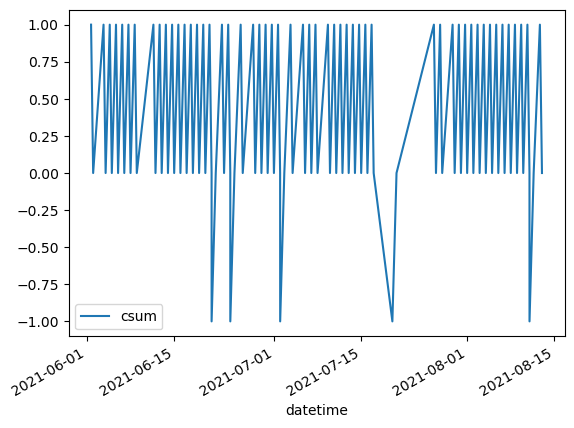

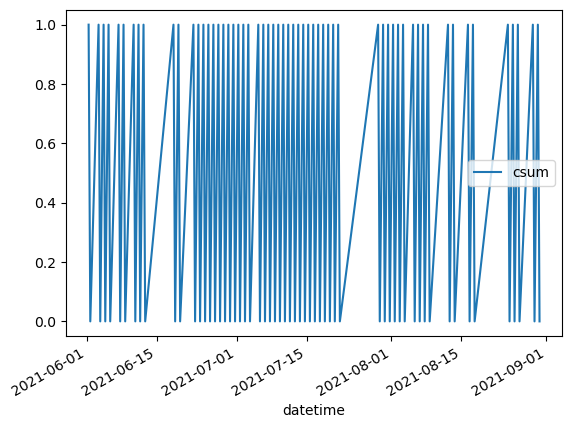

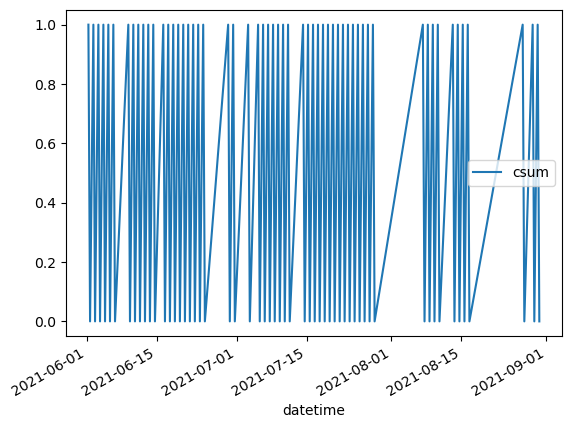

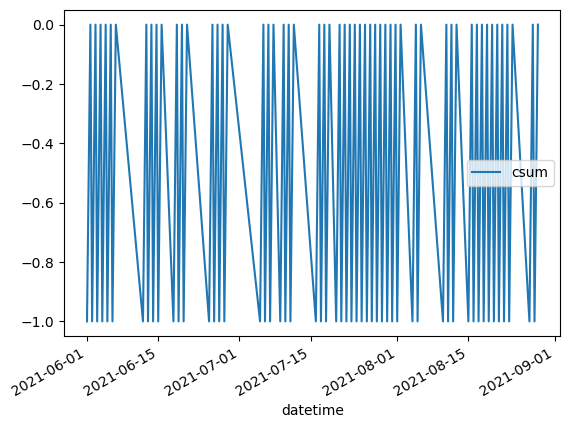

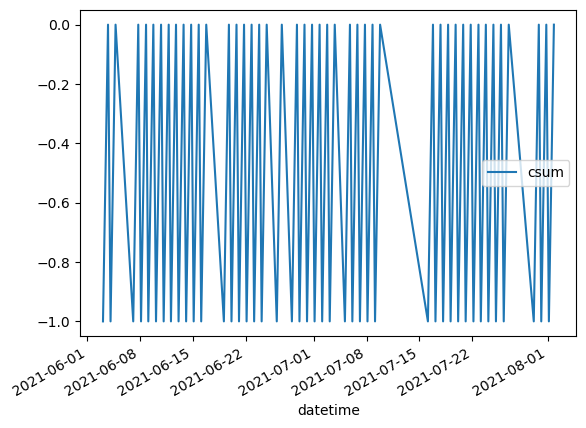

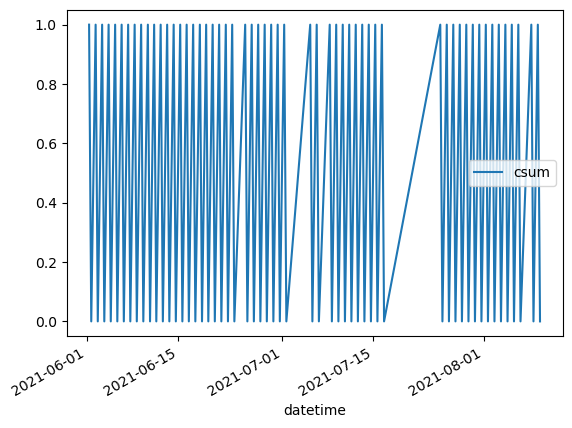

In [66]:
# for uname in strangest:
jdf_valid[jdf["uname"].isin(strangest)].groupby("uname").plot.line(x="datetime",y="csum")

In [119]:
from scipy.spatial.distance import euclidean
from scipy.signal import correlate
import pywt
import numpy as np
from fastdtw import fastdtw

wavelet = 'morl'  # Morlet wavelet
scales = np.arange(1, 10)
diffs = {}
for n, group in jdf_valid.groupby("uname"):
    june = group[group["month"]==6]
    august = group[group["month"]==8]
    jv = june["datetime"].dt.time.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    jv = jv.astype("int64").var()
    # jv = jv.var()//1e10

    av = august["datetime"].dt.time.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    av=av.astype("int64").var()
    # av = av.var()//1e10
    # jc, jf = pywt.cwt(june["csum"].values, scales, wavelet)
    # ac, af = pywt.cwt(august["csum"].values, scales, wavelet)
    diffs[n] = {"var":(jv-av)**2, "june":jv, "aug":av}

    # crr = correlate(jc, ac, mode='same')
    # diffs[n] = np.sum(np.trapz(crr))
    # break
    # diffs[n] = fastdtw(june, august, dist=euclidean)[0]

In [125]:
diffs_df = pd.DataFrame.from_records(diffs).T
# diffs_df.sort_values(0)
best = diffs_df.sort_values("var", ascending=False).head(7)
best

,var,june,aug
r.16,6.338905e+17,8.489124e+08,1.645085e+09
d.osmond,1.949253e+17,4.577667e+08,8.992702e+08
r.rupp,1.701799e+17,6.221182e+08,2.095895e+08
j.116,1.485400e+17,6.868972e+08,3.014884e+08
j.108,1.391688e+17,3.006874e+08,6.737408e+08
j.rudd,1.100770e+17,1.023856e+09,6.920772e+08
j.giliberto,1.010313e+17,6.338105e+08,3.159562e+08


<Axes: xlabel='datetime'>

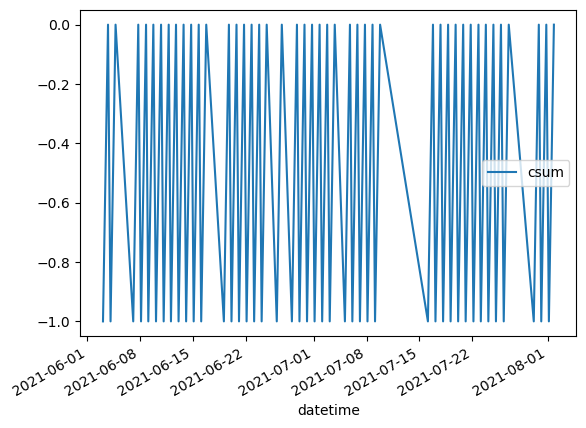

In [127]:
# for uname in strangest:
jdf[jdf["uname"]=="r.16"].plot.line(x="datetime",y="csum")

In [129]:
likely = jdf[jdf["uname"]=="r.16"]
likely

,datetime,uname,login,First Letter,Name,in_out_num,csum,month
22097,2021-06-03 03:00:00,r.16,OUT,r,16,-1,-1,6
31878,2021-06-03 18:58:00,r.16,IN,r,16,1,0,6
32731,2021-06-04 03:00:00,r.16,OUT,r,16,-1,-1,6
42522,2021-06-04 18:56:00,r.16,IN,r,16,1,0,6
64539,2021-06-07 03:02:00,r.16,OUT,r,16,-1,-1,6
...,...,...,...,...,...,...,...,...
627894,2021-07-30 19:09:00,r.16,IN,r,16,1,0,7
628625,2021-07-31 02:55:00,r.16,OUT,r,16,-1,-1,7
638481,2021-07-31 18:57:00,r.16,IN,r,16,1,0,7
639387,2021-08-01 03:08:00,r.16,OUT,r,16,-1,-1,8


In [107]:
diffs_df["aug"].idxmin()

'r.16'

In [79]:
import heapq
pairs = list(diffs.items())
large = heapq.nlargest(10, pairs, key=lambda x: x[1])
small = heapq.nsmallest(10,pairs, key=lambda x: x[1])
print(large)
print(small)

[('c.willis', 548.2576989496195), ('j.pearson', 364.5356422418745), ('b.campbell', 296.676150892006), ('z.mcdonald', 278.2606051844956), ('s.paige', 261.1353236229502), ('v.1', 260.43874520062525), ('m.kimmel', 226.88647695106917), ('i.etheredge', 215.50059438158036), ('b.10', 215.22126234747478), ('j.reardon', 214.9313584046763)]
[('s.rosado', -320.4273517313939), ('t.8', -312.45287424048433), ('r.mejia', -278.8089452670827), ('s.sanders', -269.2892030013399), ('s.hosford', -244.522151458264), ('j.keith', -236.5074165440915), ('d.selby', -230.4111509924299), ('a.schaffer', -215.8192688253121), ('p.graham', -192.6491149891629), ('t.couture', -189.4836211140839)]


uname
a.schaffer     Axes(0.125,0.2;0.775x0.68)
b.10           Axes(0.125,0.2;0.775x0.68)
b.campbell     Axes(0.125,0.2;0.775x0.68)
c.willis       Axes(0.125,0.2;0.775x0.68)
d.selby        Axes(0.125,0.2;0.775x0.68)
i.etheredge    Axes(0.125,0.2;0.775x0.68)
j.keith        Axes(0.125,0.2;0.775x0.68)
j.pearson      Axes(0.125,0.2;0.775x0.68)
j.reardon      Axes(0.125,0.2;0.775x0.68)
m.kimmel       Axes(0.125,0.2;0.775x0.68)
p.graham       Axes(0.125,0.2;0.775x0.68)
r.mejia        Axes(0.125,0.2;0.775x0.68)
s.hosford      Axes(0.125,0.2;0.775x0.68)
s.paige        Axes(0.125,0.2;0.775x0.68)
s.rosado       Axes(0.125,0.2;0.775x0.68)
s.sanders      Axes(0.125,0.2;0.775x0.68)
t.8            Axes(0.125,0.2;0.775x0.68)
t.couture      Axes(0.125,0.2;0.775x0.68)
v.1            Axes(0.125,0.2;0.775x0.68)
z.mcdonald     Axes(0.125,0.2;0.775x0.68)
dtype: object

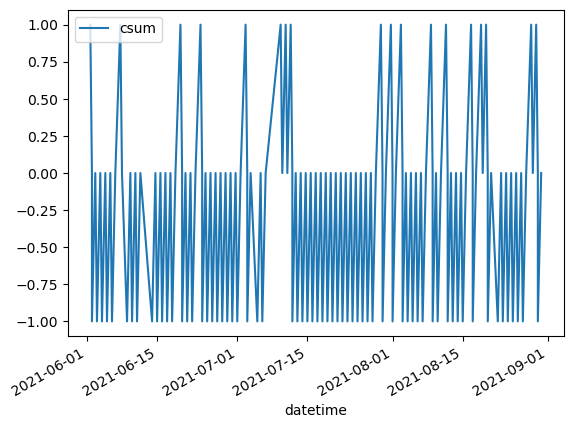

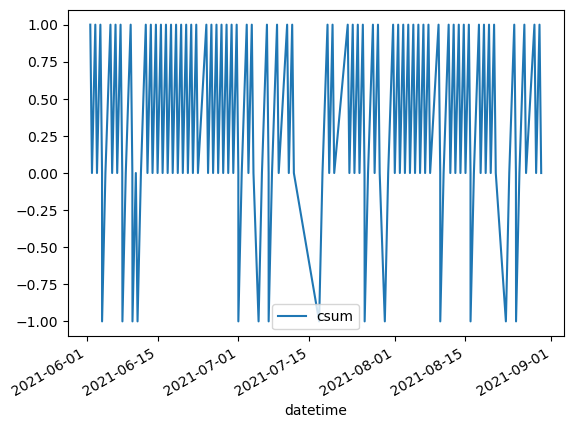

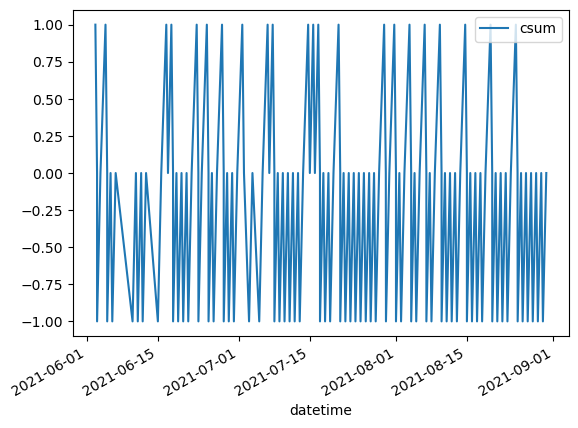

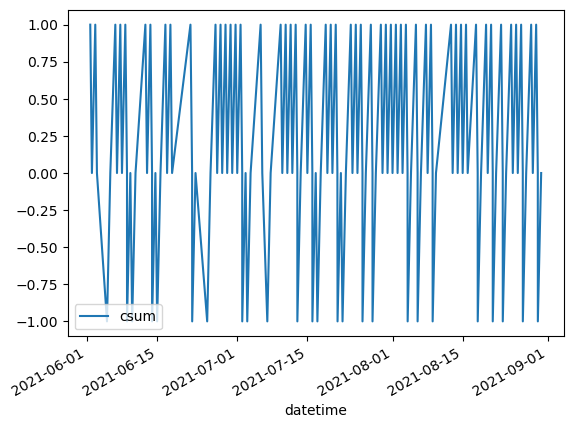

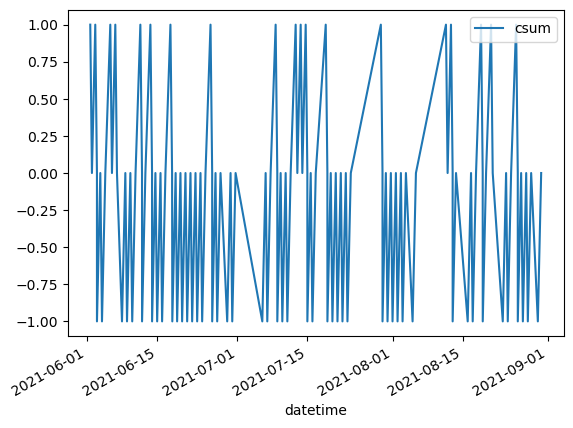

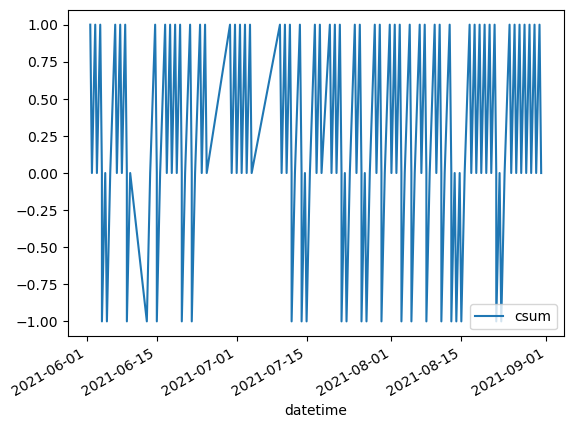

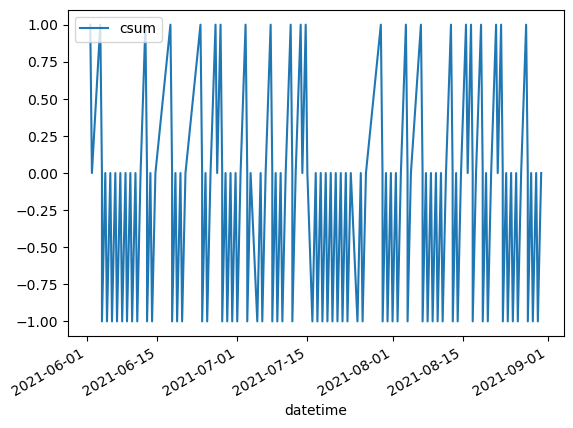

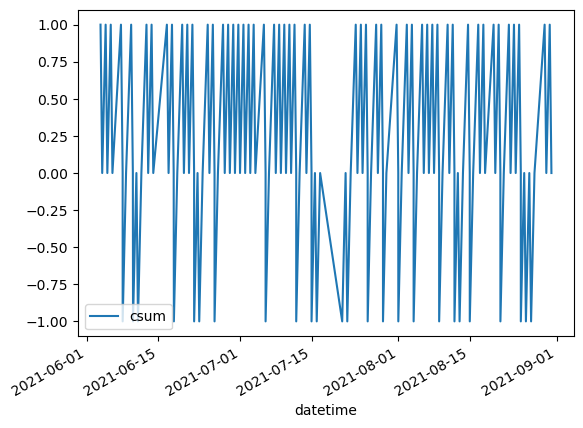

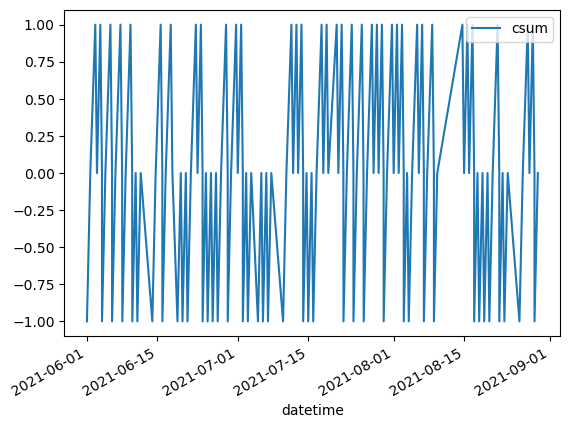

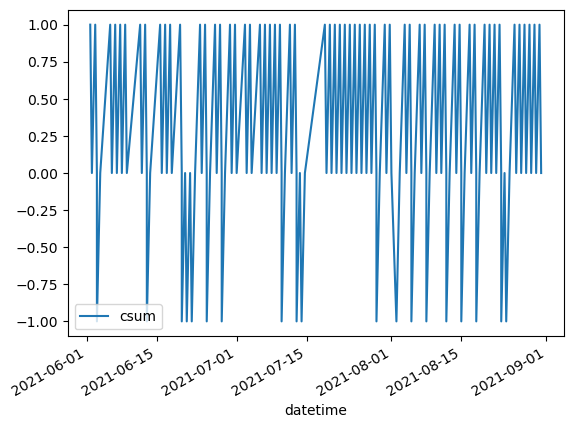

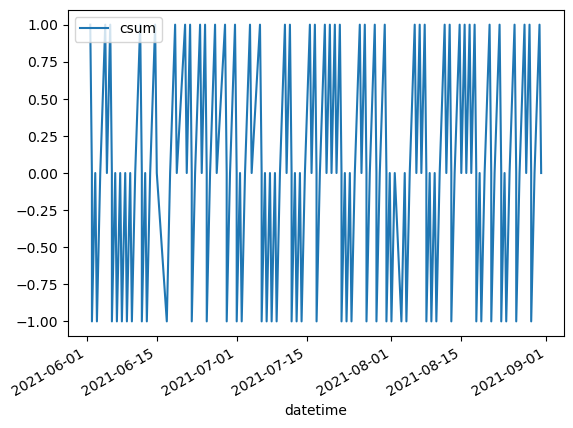

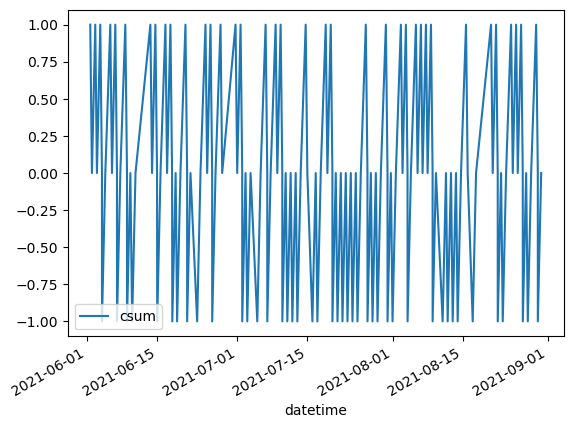

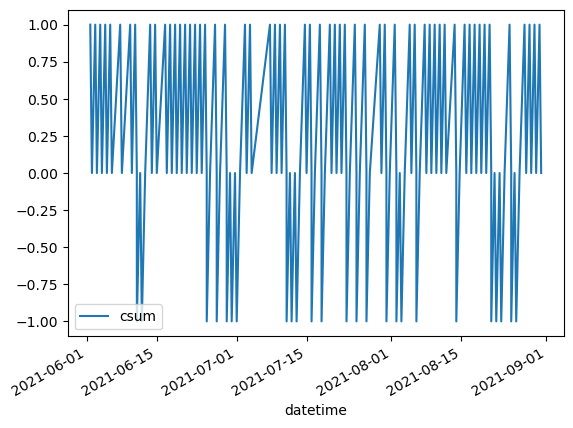

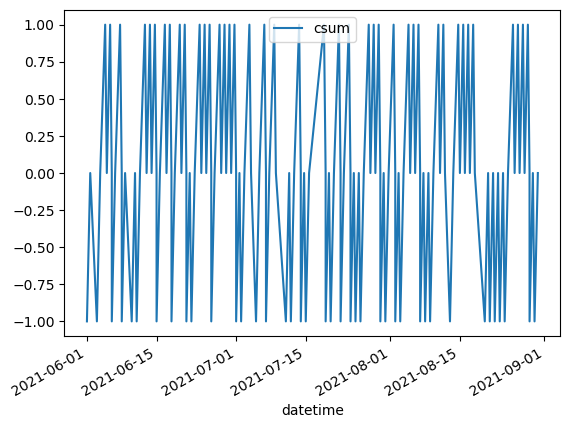

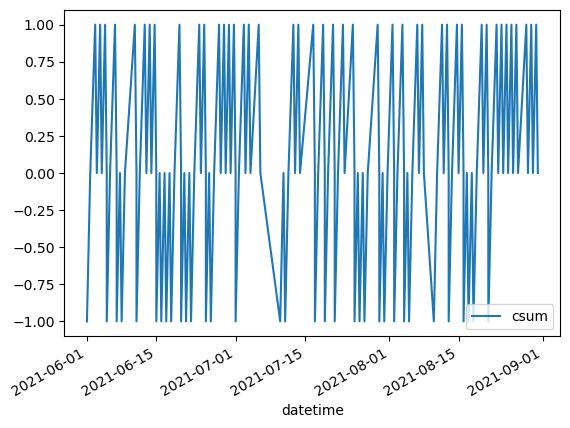

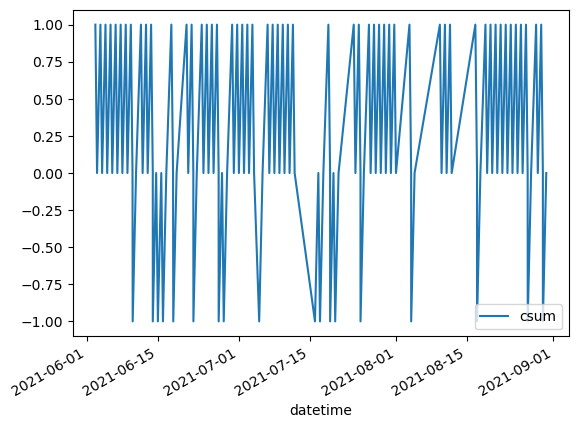

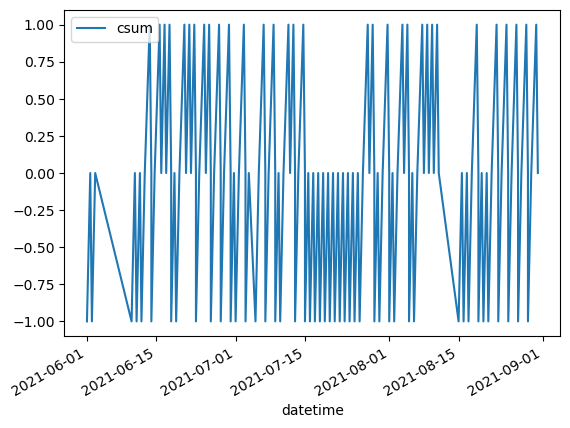

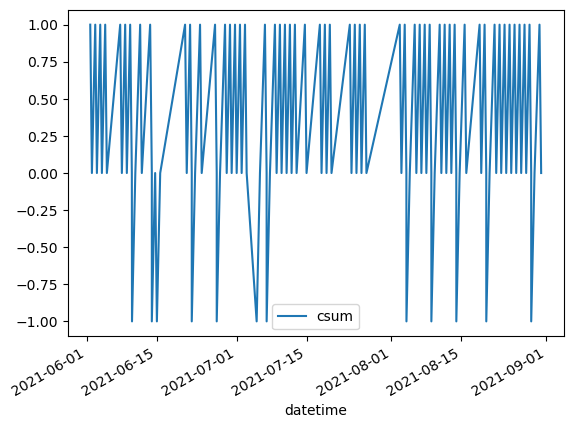

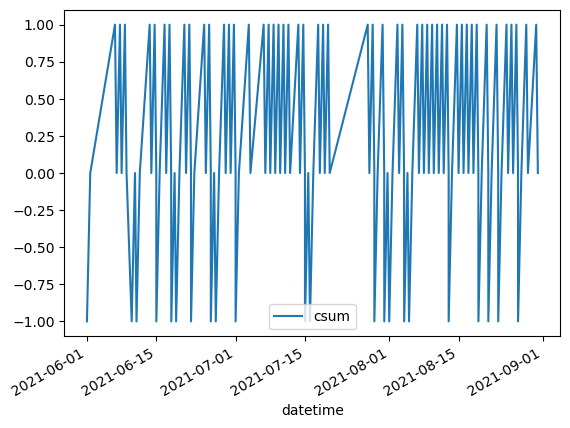

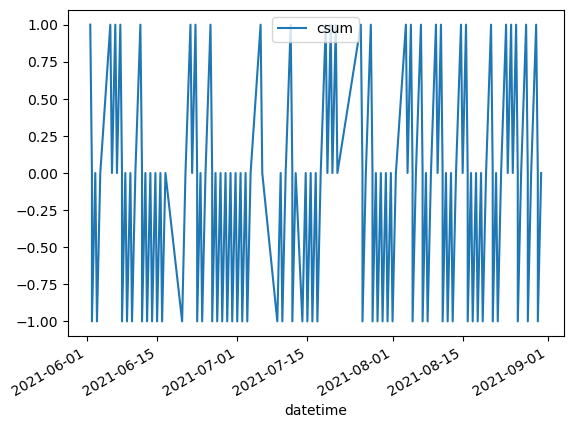

In [82]:
large_n = [a for a,b in large]
small_n = [a for a,b in small]
large_n.extend(small_n)
candidates = set(large_n)
jdf_valid[jdf_valid["uname"].isin(candidates)].groupby("uname").plot(x="datetime",y="csum")


TypeError: float() argument must be a string or a real number, not 'Timestamp'

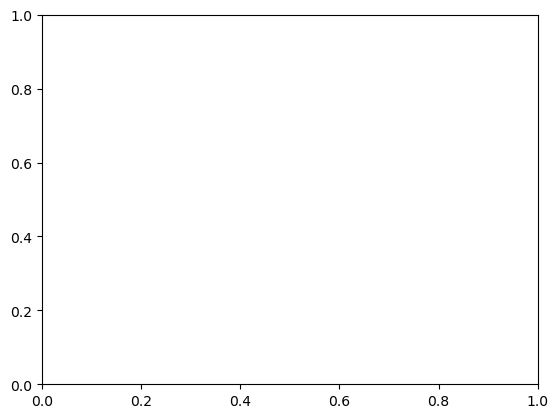

In [89]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def acf_pacf_similarity(d1, d2):
    acf_similarities = []
    # pacf_similarities = []

    for lag_range in range(1,10):
        jv, _ = plot_acf(d1, lags=lag_range, alpha=0.05, title=f'ACF - Lag Range: 1-{lag_range}', zero=False)
        av, _ = plot_acf(d2, lags=lag_range, alpha=0.05, title=f'ACF - Lag Range: 1-{lag_range}', zero=False)

        # pacf_values, _ = plot_pacf(data, lags=lag_range, alpha=0.05, title=f'PACF - Lag Range: 1-{lag_range}', zero=False)

        # Calculate Euclidean distance between corresponding lag points

        acf_similarities.append((jv-av)**2)
    # aps = np.sqrt(np.sum(acf_similarities))

    return np.sqrt(np.sum(acf_similarities))

for n, group in jdf_valid.groupby("uname"):
    june = group[group["month"]==6]
    august = group[group["month"]==8]

    diffs[n] = acf_pacf_similarity(june, august)
    break